### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

from datetime import datetime as dt

### Define Functions

In [2]:
def fit_OLS_model(X, y, train_size=0.8, cv=5, random_state=42):
    # Fit model to prepare for imputation
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f'Train Score: {lr.score(X_train, y_train)}')
    print(f'Train CV Score: {cross_val_score(lr, X_train, y_train, cv=cv).mean()}')
    print(f'Test Score: {lr.score(X_test, y_test)}')
    print(f'Coefficient: {lr.coef_[0]}')
    print(f'Intercept: {lr.intercept_}')
    
    return lr

### Clean Weather Dataset

In [3]:
weather = pd.read_csv("../assets/weather.csv", na_values=['M', '-', ' '])
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,NaN,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,NaN,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [4]:
weather.shape

(2944, 22)

#### Checking datatype
Snowfall and PrecipTotal are typed as object instead of numeric while Sunrise and Sunset were typed as float64 instead of datetime.

In [5]:
# Snowfall and PrecipTotal are identified as object rather than float64
# Sunrise and Sunset were typed as float64 instead of datetime
# Date was typed as object rather than datetime
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg           float64
Depart         float64
DewPoint         int64
WetBulb        float64
Heat           float64
Cool           float64
Sunrise        float64
Sunset         float64
CodeSum         object
Depth          float64
Water1         float64
SnowFall        object
PrecipTotal     object
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

In [6]:
# Change Date, Sunrise and Sunset to datetime format
weather['Date'] = pd.to_datetime(weather['Date'])

#### Finding out why Snowfall and PrecipTotal are typed as object

'SnowFall' has 12 rows of data are having '  T' as values. To replace '  T' as 0.01 as '  T' means that there are traces amount which meant that it is in very small qunatity. Hence replace '  T' with a value smaller than the 2nd smallest value (0.1) in the data for this predictor.

In [7]:
# There is a '  T' in the list of unique values for SnowFall
weather['SnowFall'].unique()

array(['0.0', nan, '  T', '0.1'], dtype=object)

In [8]:
# Checking number of rows with '  T'
weather['SnowFall'].value_counts()

0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [9]:
# Replace ' T' as 0.001
weather['SnowFall'].replace(to_replace='  T', value = 0.01, inplace=True)

'PrecipTotal' has 318 rows of data are having '  T' as values. To replace '  T' as 0.001 as '  T' means that there are traces amount which meant that it is in very small qunatity. Hence replace '  T' with a value smaller than the 2nd smallest value (0.01) in the data for this predictor.

In [10]:
# There is a '  T' in the list of unique values for PrecipTotal
weather['PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [11]:
# Second smallest value is 0.01
np.sort([float(i) for i in np.delete(weather['PrecipTotal'].unique(), 1)])

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.95, 0.96, 0.97, 0.98, 1.01,
       1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.09, 1.11, 1.12, 1.14, 1.15,
       1.16, 1.18, 1.19, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.28, 1.29,
       1.3 , 1.31, 1.33, 1.34, 1.35, 1.38, 1.43, 1.44, 1.46, 1.48, 1.49,
       1.55, 1.57, 1.58, 1.6 , 1.61, 1.73, 1.75, 1.82, 1.88, 1.9 , 1.96,
       2.03, 2.06, 2.09, 2.17, 2.2 , 2.24, 2.35, 2.

In [12]:
# Checking number of rows with ' T'
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
1.48       1
2.79       1
1.75       1
1.34       1
6.64       1
Name: PrecipTotal, Length: 167, dtype: int64

In [13]:
# Replace ' T' as 0.001
weather['PrecipTotal'].replace(to_replace='  T', value = 0.001, inplace=True)

In [14]:
# Typecast 'SnowFall' and 'PrecipTotal' as float64
weather = weather.astype({'SnowFall': 'float64', 'PrecipTotal': 'float64'})

In [15]:
# Checking that the typecast is done
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                  float64
Depart                float64
DewPoint                int64
WetBulb               float64
Heat                  float64
Cool                  float64
Sunrise               float64
Sunset                float64
CodeSum                object
Depth                 float64
Water1                float64
SnowFall              float64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

#### Dropping Depth and Water1 due to no variance in data
As 'Water1' and 'Depth' only have zero and a single value respectively, hence no variance, it would not be able to provide information or contribute to the model. As such, decided to drop 'Water1' and 'Depth' from data.

In [16]:
# Checking number of unique values per predictor
print("Number of unique values for each predictor")
for col in weather.columns:
    print(f'{col}: {weather[col].nunique()}')

Number of unique values for each predictor
Station: 2
Date: 1472
Tmax: 63
Tmin: 54
Tavg: 59
Depart: 41
DewPoint: 54
WetBulb: 47
Heat: 30
Cool: 30
Sunrise: 121
Sunset: 118
CodeSum: 97
Depth: 1
Water1: 0
SnowFall: 3
PrecipTotal: 167
StnPressure: 103
SeaLevel: 101
ResultSpeed: 190
ResultDir: 36
AvgSpeed: 177


In [17]:
# Droppping 'Depth' and 'Water1' from data
weather.drop(columns=['Depth', 'Water1'], inplace=True)

#### Checking for missing values

In [18]:
weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum        1609
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

#### Imputing NA in CodeSum as MD
As CodeSum whitespace string, which was treated as missing values, means that the weather is moderate. Hence instead of NA, to replace with 'MD'.

In [19]:
weather['CodeSum'].fillna('MD', inplace=True)

#### Dropping Heat and Cold
As Heat and Cool are known as heating degree day (HDD) and cooling degree day (CDD) respectively and are calculated based on differences from 65°F. When Tavg is lower than 65°F, HDD will be non-zero and will be equal to 65 - Tavg while CDD will be 0. On the otherhand if Tavg is higher than 65°F, CDD will be non-zero and equal to Tavg - 65 while HDD will be 0. Hence, it does not provide additional information that Tavg does not provide.

Text(0.5, 1.0, 'Cool vs Tavg')

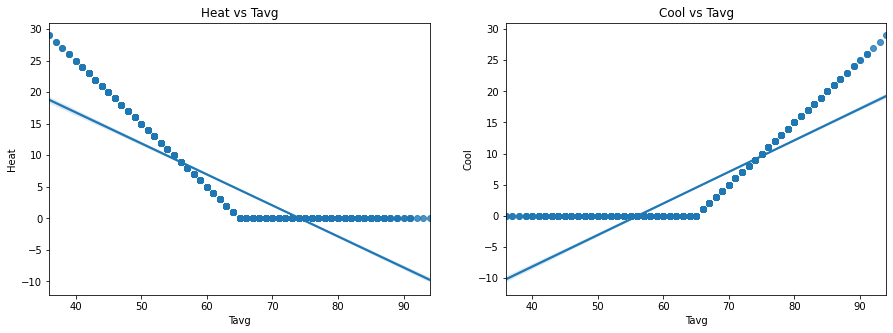

In [20]:
# SHowing how Heat and Cool vary with Tavg
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x='Tavg', y='Heat', data=weather, ax=ax[0])
ax[0].set_title('Heat vs Tavg')
sns.regplot(x='Tavg', y='Cool', data=weather, ax=ax[1])
ax[1].set_title('Cool vs Tavg')

In [21]:
weather.drop(columns=['Heat', 'Cool'], inplace=True)

#### Split Data Set into station 1 and station 2
As station 2 has multiple predictors having missing values, either dropping the columns or dropping NA rows would lead to valuable data loss. Hence, to retain as much data as possible, the decision is to separate the data for the 2 stations with their own columns.

In [22]:
# All 1472 rows that are missing are from station 2
for col in ['Depart', 'Sunrise', 'Sunset', 'SnowFall']:
    print(col, "\n", weather[weather[col].isnull()].groupby('Station').size(), "\n")

Depart 
 Station
2    1472
dtype: int64 

Sunrise 
 Station
2    1472
dtype: int64 

Sunset 
 Station
2    1472
dtype: int64 

SnowFall 
 Station
2    1472
dtype: int64 



In [23]:
# Split weather dataset into weather1 and weather2
weather1 = weather[weather['Station'] == 1].copy()
weather2 = weather[weather['Station'] == 2].copy()

In [24]:
# Converting sunrise and sunset to correct format
weather1['Sunset'] = weather1['Sunset'].apply(lambda x: (int(x/100)+1)*100 if x%100==60 else int(x)).astype('str')
weather1['Sunrise'] = weather1['Sunrise'].apply(lambda x: (int(x/100)+1)*100 if x%100==60 else int(x)).astype('str')

# Adding Date to Sunset and Sunrise
weather1['Sunset'] = weather1['Date'].astype('str') + " " + weather1['Sunset']
weather1['Sunrise'] = weather1['Date'].astype('str') + " " + weather1['Sunrise']

# Change Sunset and Sunrise to datetime format
weather1['Sunset'] = pd.to_datetime(weather1['Sunset'], format='%Y-%m-%d %H%M')
weather1['Sunrise'] = pd.to_datetime(weather1['Sunrise'], format='%Y-%m-%d %H%M')

In [25]:
# Drop columns 'Depart', 'Sunrise', 'Sunset', 'Depth', 'SnowFall' from weather 2 since all rows are missing data
weather2.drop(columns=['Depart', 'Sunrise', 'Sunset', 'SnowFall'], inplace=True)

In [26]:
# Merge weather_1 and weather_2 together
weather_df = pd.merge(left=weather1,
                     right=weather2,
                     on='Date',
                     suffixes=('_1', '_2'))

# Dropping "Station_1" and "Station_2"
weather_df.drop(columns=['Station_1', 'Station_2'], inplace=True)

# Renaming Sunrise, Sunset, SnowFall with suffix _1
weather_df.rename(columns={'Depart': 'Depart_1',
                           'Sunrise': 'Sunrise_1',
                           'Sunset': 'Sunset_1',
                           'SnowFall': 'SnowFall_1'}, inplace=True)

weather_df['Sunrise_1'] = pd.to_datetime(weather_df['Sunrise_1'], format='%H%M')

# Checking if changes were done correctly
weather_df

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Sunrise_1,Sunset_1,CodeSum_1,...,Tavg_2,DewPoint_2,WetBulb_2,CodeSum_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2007-05-01,83,50,67.0,14.0,51,56.0,2007-05-01 04:48:00,2007-05-01 18:49:00,MD,...,68.0,51,57.0,MD,0.000,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51.0,-3.0,42,47.0,2007-05-02 04:47:00,2007-05-02 18:50:00,BR,...,52.0,42,47.0,BR HZ,0.000,29.44,30.08,13.3,2,13.4
2,2007-05-03,66,46,56.0,2.0,40,48.0,2007-05-03 04:46:00,2007-05-03 18:51:00,MD,...,58.0,40,50.0,HZ,0.000,29.46,30.12,12.9,6,13.2
3,2007-05-04,66,49,58.0,4.0,41,50.0,2007-05-04 04:44:00,2007-05-04 18:52:00,RA,...,NaN,42,50.0,MD,0.000,29.36,30.04,10.1,7,10.4
4,2007-05-05,66,53,60.0,5.0,38,49.0,2007-05-05 04:43:00,2007-05-05 18:53:00,MD,...,60.0,39,50.0,MD,0.001,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,77,51,64.0,16.0,51,58.0,2014-10-27 06:18:00,2014-10-27 16:53:00,MD,...,67.0,52,59.0,RA,0.020,29.00,29.67,12.7,19,13.6
1468,2014-10-28,68,45,57.0,10.0,38,47.0,2014-10-28 06:19:00,2014-10-28 16:51:00,MD,...,57.0,40,48.0,RA,0.030,29.23,29.85,14.0,26,14.6
1469,2014-10-29,49,36,43.0,-4.0,32,40.0,2014-10-29 06:20:00,2014-10-29 16:50:00,MD,...,45.0,34,42.0,MD,0.000,29.42,30.07,8.5,29,9.0
1470,2014-10-30,51,32,42.0,-4.0,34,40.0,2014-10-30 06:22:00,2014-10-30 16:49:00,MD,...,45.0,35,42.0,RA,0.001,29.41,30.10,5.9,23,6.5


#### Checking which columns missing values are coming from

In [27]:
weather_df.isnull().sum().sort_values(ascending=False)

Tavg_2           11
SeaLevel_1        5
SeaLevel_2        4
WetBulb_1         3
AvgSpeed_2        3
PrecipTotal_2     2
StnPressure_2     2
StnPressure_1     2
WetBulb_2         1
Tmin_1            0
Tavg_1            0
SnowFall_1        0
Depart_1          0
DewPoint_1        0
Sunrise_1         0
Sunset_1          0
Tmax_1            0
CodeSum_1         0
ResultSpeed_1     0
PrecipTotal_1     0
ResultDir_2       0
ResultDir_1       0
AvgSpeed_1        0
Tmax_2            0
Tmin_2            0
DewPoint_2        0
CodeSum_2         0
ResultSpeed_2     0
Date              0
dtype: int64

#### Imputing Tavg_2 missing data with model using Tavg_1
As Tavg_2 is highly collinear with Tavg_1, missing values from Tavg_2 would be imputed using OLS model using Tavg_1 as predictor.

          Tavg_1    Tavg_2
Tavg_1  1.000000  0.992288
Tavg_2  0.992288  1.000000


<AxesSubplot:xlabel='Tavg_1', ylabel='Tavg_2'>

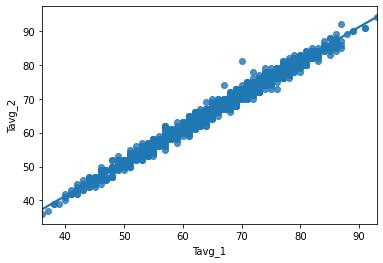

In [28]:
# Checking if Tavg_1 and Tavg_2 are correlated
print(weather_df[['Tavg_1', 'Tavg_2']].corr())
sns.regplot(x='Tavg_1', y='Tavg_2', data=weather_df)

In [29]:
# Fit model using Tavg_1 and Tavg_2
temp = weather_df[['Tavg_1', 'Tavg_2']].dropna()
X = temp[['Tavg_1']]
y = temp['Tavg_2']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'Tavg_2'
predictor = 'Tavg_1'
for i in weather_df[weather_df[target].isnull()].index:
    weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

Train Score: 0.9840088837573961
Train CV Score: 0.9838207971882893
Test Score: 0.9867643556783723
Coefficient: 0.9948824015847249
Intercept: 1.6023004436676445


#### Using StnPressure_1 and StnPressure_2 for imputation
There is 1 missing data when trying to use either StnPressure_1  or StnPressure_2 for imputation for each other, to look for other predictors to fill the remaining missing values.

               StnPressure_1  StnPressure_2
StnPressure_1       1.000000       0.998212
StnPressure_2       0.998212       1.000000


<AxesSubplot:xlabel='StnPressure_1', ylabel='StnPressure_2'>

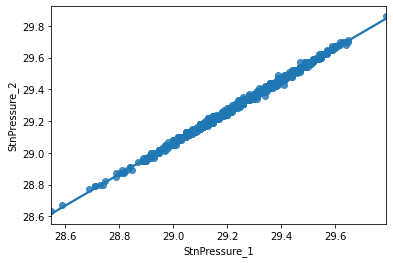

In [30]:
# Checking if StnPressure_1 and StnPressure_2 are correlated
print(weather_df[['StnPressure_1', 'StnPressure_2']].corr())
sns.regplot(x='StnPressure_1', y='StnPressure_2', data=weather_df)

In [31]:
# There is a missing value if we are using StnPressure_2 values to impute for StnPressure_1
# To look for other predictors as source of imputation
weather_df[weather_df['StnPressure_1'].isnull()]['StnPressure_2']

424     29.2
1205     NaN
Name: StnPressure_2, dtype: float64

In [32]:
# There is a missing value if we are using StnPressure_1 values to impute for StnPressure_2
# To look for other predictors as source of imputation
weather_df[weather_df['StnPressure_2'].isnull()]['StnPressure_1']

43      29.36
1205      NaN
Name: StnPressure_1, dtype: float64

In [33]:
# Fit model using StnPressure_1 and StnPressure_2
temp = weather_df[['StnPressure_1', 'StnPressure_2']].dropna()

#Modeling and Imputing for StnPressure_1
print('For StnPressure_1')
X = temp[['StnPressure_2']]
y = temp['StnPressure_1']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'StnPressure_1'
predictor = 'StnPressure_2'
for i in weather_df[weather_df[target].isnull()].index:
    if not(np.isnan(weather_df.loc[i, predictor])):
        weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])
    
    
#Modeling and Imputing for StnPressure_2
print('For StnPressure_2')
X = temp[['StnPressure_1']]
y = temp['StnPressure_2']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'StnPressure_2'
predictor = 'StnPressure_1'
for i in weather_df[weather_df[target].isnull()].index:
    if not(np.isnan(weather_df.loc[i, predictor])):
        weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

For StnPressure_1
Train Score: 0.9962937629594687
Train CV Score: 0.9962532831804897
Test Score: 0.9968994945824139
Coefficient: 1.005038349695792
Intercept: -0.20832017824454496
For StnPressure_2
Train Score: 0.9962937629594686
Train CV Score: 0.9962540863323076
Test Score: 0.9968952478936524
Coefficient: 0.9912992506813582
Intercept: 0.3151682612203466


#### Using SeaLevel to impute StnPressure

               StnPressure_1  SeaLevel_1
StnPressure_1       1.000000    0.993643
SeaLevel_1          0.993643    1.000000


<AxesSubplot:xlabel='SeaLevel_1', ylabel='StnPressure_1'>

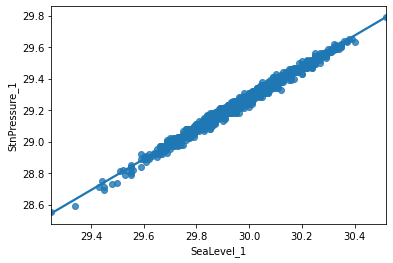

In [34]:
# Checking if SeaLevel_1 and StnPressure_1 are correlated to use for imputation
print(weather_df[['StnPressure_1', 'SeaLevel_1']].corr())
sns.regplot(x='SeaLevel_1', y='StnPressure_1', data=weather_df)

In [35]:
# Model and impute StnPressure_1 using SeaLevel_1
temp = weather_df[['StnPressure_1', 'SeaLevel_1']].dropna()
X = temp[['SeaLevel_1']]
y = temp['StnPressure_1']
fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'StnPressure_1'
predictor = 'SeaLevel_1'
for i in weather_df[weather_df[target].isnull()].index:
    weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

Train Score: 0.9867446004080416
Train CV Score: 0.9864941964814136
Test Score: 0.9894378883879629
Coefficient: 0.9794838492654315
Intercept: -0.10392655852587751


               StnPressure_2  SeaLevel_2
StnPressure_2       1.000000    0.991628
SeaLevel_2          0.991628    1.000000


<AxesSubplot:xlabel='SeaLevel_2', ylabel='StnPressure_2'>

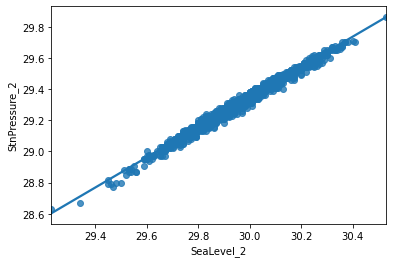

In [36]:
# Checking if SeaLevel_2 and StnPressure_2 are correlated to use for imputation
print(weather_df[['StnPressure_2', 'SeaLevel_2']].corr())
sns.regplot(x='SeaLevel_2', y='StnPressure_2', data=weather_df)

In [37]:
# Model and impute StnPressure_1 using SeaLevel_1
temp = weather_df[['StnPressure_2', 'SeaLevel_2']].dropna()
X = temp[['SeaLevel_2']]
y = temp['StnPressure_2']
fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'StnPressure_2'
predictor = 'SeaLevel_2'
for i in weather_df[weather_df[target].isnull()].index:
    weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

Train Score: 0.9828848857831869
Train CV Score: 0.9826193032229069
Test Score: 0.984802286260711
Coefficient: 0.9680718619108806
Intercept: 0.3075384459098487


#### Imputing for WetBulb_1 and WetBulb_2

           WetBulb_1  WetBulb_2
WetBulb_1   1.000000   0.994167
WetBulb_2   0.994167   1.000000


<AxesSubplot:xlabel='WetBulb_1', ylabel='WetBulb_2'>

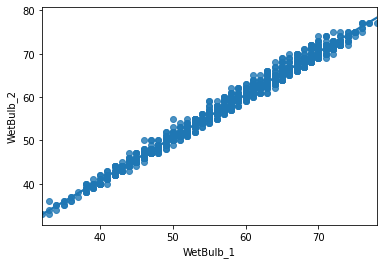

In [38]:
# Checking if WetBulb_1 and WetBulb_2 are correlated to use for imputation
print(weather_df[['WetBulb_1', 'WetBulb_2']].corr())
sns.regplot(x='WetBulb_1', y='WetBulb_2', data=weather_df)

In [39]:
# Fit model using WetBulb_1 and WetBulb_2
temp = weather_df[['WetBulb_1', 'WetBulb_2']].dropna()

#Modeling and Imputing for WetBulb_1
print('For WetBulb_1')
X = temp[['WetBulb_2']]
y = temp['WetBulb_1']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'WetBulb_1'
predictor = 'WetBulb_2'
for i in weather_df[weather_df[target].isnull()].index:
    if not(np.isnan(weather_df.loc[i, predictor])):
        weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])
    
    
#Modeling and Imputing for WetBulb_2
print('For WetBulb_2')
X = temp[['WetBulb_1']]
y = temp['WetBulb_2']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'WetBulb_2'
predictor = 'WetBulb_1'
for i in weather_df[weather_df[target].isnull()].index:
    if not(np.isnan(weather_df.loc[i, predictor])):
        weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

For WetBulb_1
Train Score: 0.9885044205748277
Train CV Score: 0.9883210880374598
Test Score: 0.9877777336453579
Coefficient: 1.000814977318124
Intercept: -0.5791687352401738
For WetBulb_2
Train Score: 0.9885044205748277
Train CV Score: 0.9883156237759081
Test Score: 0.9877627325977675
Coefficient: 0.9876994679113561
Intercept: 1.256217671726155


#### Imputing for AvgSpeed_2

            AvgSpeed_1  AvgSpeed_2
AvgSpeed_1    1.000000    0.950779
AvgSpeed_2    0.950779    1.000000


<AxesSubplot:xlabel='AvgSpeed_1', ylabel='AvgSpeed_2'>

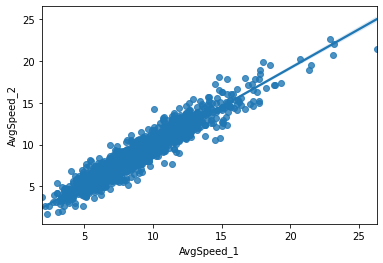

In [40]:
# Checking if AvgSpeed_1 and AvgSpeed_2 are correlated to use for imputation
print(weather_df[['AvgSpeed_1', 'AvgSpeed_2']].corr())
sns.regplot(x='AvgSpeed_1', y='AvgSpeed_2', data=weather_df)

In [41]:
# Fit model using AvgSpeed_1 and AvgSpeed_2
temp = weather_df[['AvgSpeed_1', 'AvgSpeed_2']].dropna()

#Modeling and Imputing for AvgSpeed_2
print('For AvgSpeed_2')
X = temp[['AvgSpeed_1']]
y = temp['AvgSpeed_2']
lr = fit_OLS_model(X, y, train_size=0.8, cv=5)

# Impute missing value via prediction using linear model
target = 'AvgSpeed_2'
predictor = 'AvgSpeed_1'
for i in weather_df[weather_df[target].isnull()].index:
    if not(np.isnan(weather_df.loc[i, predictor])):
        weather_df.loc[i, target] = lr.predict([[weather_df.loc[i, predictor]]])

For AvgSpeed_2
Train Score: 0.9063718971133733
Train CV Score: 0.9043196124722789
Test Score: 0.8934017556138528
Coefficient: 0.9240877554860656
Intercept: 0.6697866952739204


#### Checking if PrecipTotal_2 can be imputed using PrecipTotal_1

               PrecipTotal_1  PrecipTotal_2
PrecipTotal_1       1.000000       0.669436
PrecipTotal_2       0.669436       1.000000


<AxesSubplot:xlabel='PrecipTotal_1', ylabel='PrecipTotal_2'>

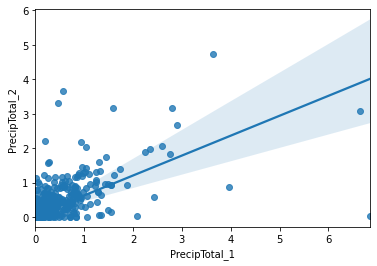

In [42]:
# Checking if AvgSpeed_1 and AvgSpeed_2 are correlated to use for imputation
print(weather_df[['PrecipTotal_1', 'PrecipTotal_2']].corr())
sns.regplot(x='PrecipTotal_1', y='PrecipTotal_2', data=weather_df)

In [43]:
# Since the correlation is less than ideal, to impute PrecipTotal_2 using median of PrecipTotal_2 instead
weather_df['PrecipTotal_2'].fillna(weather_df['PrecipTotal_2'].median(), inplace=True)

In [44]:
# Since SeaLevel_1 and SeaLevel_2 are highly correlated to StnPressure, to drop SeaLevel_1 and SeaLevel_2 instead
weather_df.drop(columns=['SeaLevel_1', 'SeaLevel_2'], inplace=True)

In [45]:
# Check that all missing values are addressed
weather_df.isnull().sum()

Date             0
Tmax_1           0
Tmin_1           0
Tavg_1           0
Depart_1         0
DewPoint_1       0
WetBulb_1        0
Sunrise_1        0
Sunset_1         0
CodeSum_1        0
SnowFall_1       0
PrecipTotal_1    0
StnPressure_1    0
ResultSpeed_1    0
ResultDir_1      0
AvgSpeed_1       0
Tmax_2           0
Tmin_2           0
Tavg_2           0
DewPoint_2       0
WetBulb_2        0
CodeSum_2        0
PrecipTotal_2    0
StnPressure_2    0
ResultSpeed_2    0
ResultDir_2      0
AvgSpeed_2       0
dtype: int64

#### Output as csv

In [46]:
# Write to csv
weather_df.to_csv('../assets_clean/weather_clean.csv', index=False)